Name: Saad Aldwsry
 
3/18/2021

Advanced Data Mining
 
Critical Thinking Assignment Submission


1) The iris dataset is a classic multi-class classification dataset.

Classes: 3, each class represneting a species (setosa, versicolor, virginica). 

Samples per class: 50

Samples total: 150

Dimensionality: 4

Features: real, positive
 
 3) Different results because of differences in training data.

In [ ]:
pip install pandas

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pd.options.display.max_colwidth = 1000 # this allows us to see more columns
pd.options.display.max_rows = 1000 # this allows us to see more rows

#### Load data

<a href=http://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29>Variable description</a>

In [ ]:
from sklearn.datasets import load_iris


df_data = pd.read_csv('iris.csv')
df_data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
# examine data types
df_data.dtypes #Pandas data types, object corresponds String data type in Python

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [ ]:
#The sum of the missing values in each variable
df_data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [ ]:
#The sum of the missing values in all variables
df_data.isnull().sum().sum()

0

In [ ]:
# examine the top 10 rows of the data frame
df_data.head(10)
#df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [ ]:
# examine the last 10 rows of the data frame
df_data.tail(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
140,6.7,3.1,5.6,2.4
141,6.9,3.1,5.1,2.3
142,5.8,2.7,5.1,1.9
143,6.8,3.2,5.9,2.3
144,6.7,3.3,5.7,2.5
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [ ]:
# examine data types
df_data.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object

In [ ]:
from sklearn import preprocessing, metrics 
from sklearn.preprocessing import LabelEncoder

# LABEL ENCODER
le = preprocessing.LabelEncoder()
# ENCODE LABEL TARGET COLUMN VARIETY 
df_data['variety'] = le.fit_transform(df_data['variety'])
# SHOW RESULT AFTER ENCODING 
print(f"Result after label encoding the target:\n{df_data['variety'].unique()}")

Result after label encoding the target:
[0 1 2]


In [ ]:
# examine data types again
df_data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety           int64
dtype: object

In [ ]:
df_data.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


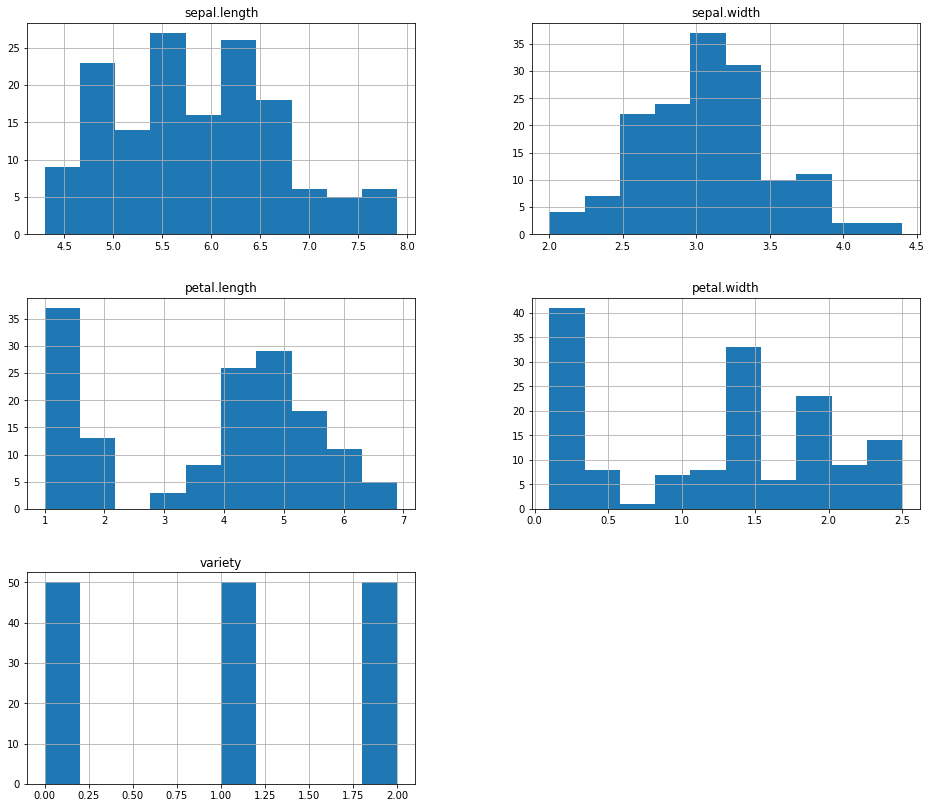

In [ ]:
# produce some histograms
df_data.hist(figsize=(16, 14));

In [ ]:
# examine data types again
df_data.dtypes

sepal.length    float64
sepal.width     float64
petal.length    float64
petal.width     float64
variety           int64
dtype: object

#### Split the data into training and testing sets

In [ ]:
from sklearn.model_selection  import train_test_split
# DATA SPLITTING TRAIN / TEST
x_train, x_test, y_train, y_test = train_test_split(df_data.drop(['variety'], axis=1), df_data['variety'], test_size=0.4, random_state=5)

print(f"Shape of X-Training : {x_train.shape}")
print(f"Shape of Y-Training : {y_train.shape}")
print(f"Shape of X-Test : {x_test.shape}")
print(f"Shape of Y-Test : {y_test.shape}")

Shape of X-Training : (90, 4)
Shape of Y-Training : (90,)
Shape of X-Test : (60, 4)
Shape of Y-Test : (60,)


#### Decision Tree

In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# train/build model
clf = clf.fit(x_train, y_train)
# make prediction
y_pred = clf.predict(x_test) 
# evaluate the prediction results
from sklearn.metrics import classification_report
for line in classification_report(y_test, y_pred).split("\n"):
    print (line)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.90      0.95        21
           2       0.90      1.00      0.95        19

    accuracy                           0.97        60
   macro avg       0.97      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
# train model
clf = clf.fit(x_train, y_train)
# make prediction
y_pred = clf.predict(x_test) # pred_y=[1,2,2,1,..........,2]
# evaluate the prediction results

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

print ("f1:" + str(f1_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("accuracy:" + str(accuracy_score(y_pred, y_test)))
print ("precision:" + str(precision_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("recall:" + str(recall_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))

f1:0.9500000000000001
accuracy:0.95
precision:0.95
recall:0.95


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


#### Support Vector Machine

In [ ]:
from sklearn.svm import LinearSVC
clf = LinearSVC(random_state=123456)
# train/build model
clf = clf.fit(x_train, y_train)
# make prediction
pred_y = clf.predict(x_test)
# evaluate the prediction results
print ("f1:" + str(f1_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("accuracy:" + str(accuracy_score(y_pred, y_test)))
print ("precision:" + str(precision_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("recall:" + str(recall_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))

f1:0.9500000000000001
accuracy:0.95
precision:0.95
recall:0.95


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


#### Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
# train model
clf = clf.fit(x_train, y_train)
# make prediction
pred_y = clf.predict(x_test)
# evaluate the prediction results
print ("f1:" + str(f1_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("accuracy:" + str(accuracy_score(y_pred, y_test)))
print ("precision:" + str(precision_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("recall:" + str(recall_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))

f1:0.9500000000000001
accuracy:0.95
precision:0.95
recall:0.95


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred_y=knn.predict(x_test)

# evaluate the prediction results
print ("f1:" + str(f1_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("accuracy:" + str(accuracy_score(y_pred, y_test)))
print ("precision:" + str(precision_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))
print ("recall:" + str(recall_score(y_pred, y_test, 
                                           pos_label='positive',
                                           average='micro')))

f1:0.9500000000000001
accuracy:0.95
precision:0.95
recall:0.95


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


In [ ]:
def report(y_pred, y_test):
    class_report = classification_report(y_test, y_pred)
    print(f"Classification Report\n {class_report}")
    confusion = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix\n {confusion}")
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    print(f"Accuracy Score{accuracy_score}")

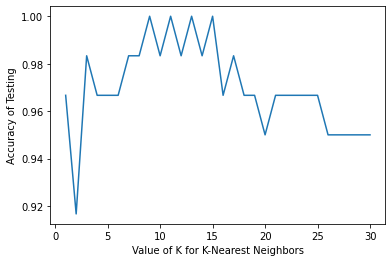

Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      0.95      0.98        21
           2       0.95      1.00      0.97        19

    accuracy                           0.98        60
   macro avg       0.98      0.98      0.98        60
weighted avg       0.98      0.98      0.98        60

Confusion Matrix
 [[20  0  0]
 [ 0 20  1]
 [ 0  0 19]]
Accuracy Score0.9833333333333333
Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       0.91      0.95      0.93        21
           2       0.94      0.89      0.92        19

    accuracy                           0.95        60
   macro avg       0.95      0.95      0.95        60
weighted avg       0.95      0.95      0.95        60

Confusion Matrix
 [[20  0  0]
 [ 0 20  1]
 [ 0  2 17]]
Accuracy Score0.95


In [ ]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


# set K-Range
k_range = range(1,31)
# DATA STRUCTURES FOR STORAGE
scores = {}
scores_list = []
# LOOP THROUGH K-RANGE
for k in k_range: 
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train, y_train)
  y_pred=knn.predict(x_test)
  scores[k]=metrics.accuracy_score(y_test, y_pred)
  scores_list.append(metrics.accuracy_score(y_test, y_pred))


# PLOT RELATIONSHIP BETWEEN K & TESTING ACCURACY 
plt.plot(k_range, scores_list)
plt.xlabel('Value of K for K-Nearest Neighbors')
plt.ylabel('Accuracy of Testing')
plt.show()

# METRICS & RESULTS 
logistic_reg = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_reg.fit(x_train, y_train)
y_pred = logistic_reg.predict(x_test)
# SUMMARY
report(y_pred, y_test)

# CRAETE GAUSSIAN CLASSIFIER 
clf = RandomForestClassifier(n_estimators=500)
# TRAIN MODEL
clf.fit(x_train, y_train)
randomforest_pred = clf.predict(x_test)
# SUMMARY 
report(randomforest_pred, y_test)

Performance in a Multiclass classification setting
print ("f1:" + str(f1_score(pred_y, test_y, average='micro')))
print ("accuracy:" + str(accuracy_score(pred_y, test_y)))
print ("precision:" + str(precision_score(pred_y, test_y,average='micro')))
print ("recall:" + str(recall_score(pred_y, test_y,average='micro')))

See this link for Multi-Class example
https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1